In [1]:
from figure_utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

runtime_df = pd.read_parquet(f"{RESULT_DIR}/daic/preprocessed.parquet")
gpu_mapping = {'2080': '2080Ti', '1080': '1080Ti', 'a40': 'A40', 'p100': 'P100', 'v100': 'V100'}

# runtime_df = runtime_df[(runtime_df.dataset_type == 'tpc_ai') & (~runtime_df.operator.isin(['Noop', 'Materialization']))]
# runtime_df.GPU = runtime_df.GPU.astype(str).apply(lambda x: gpu_mapping[x])
# runtime_df.head()\
runtime_df = runtime_df[(runtime_df.operator.isin(MODEL_OPERATORS)) 
                        & (runtime_df.compute_type == 'gpu')
                        ]
tpc_df = runtime_df[runtime_df.dataset_type=='tpc_ai']
tpc_df['usecase'] = tpc_df.dataset.str.split(":").str[0]

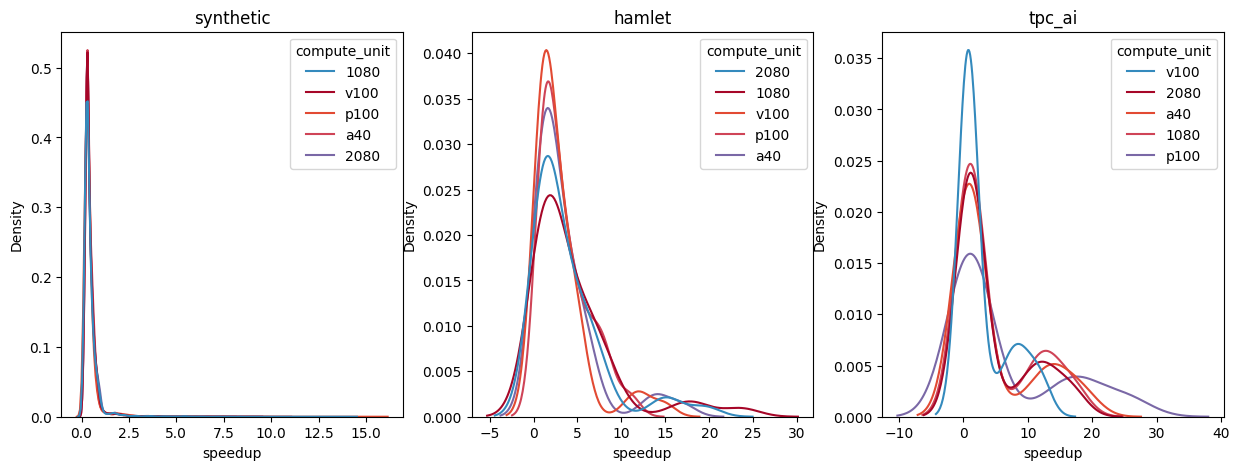

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, dataset_type in enumerate(runtime_df.dataset_type.unique()):
    sns.kdeplot(data=runtime_df[runtime_df.dataset_type == dataset_type], x='speedup', hue='compute_unit', ax=ax[i])
    ax[i].set_title(dataset_type)

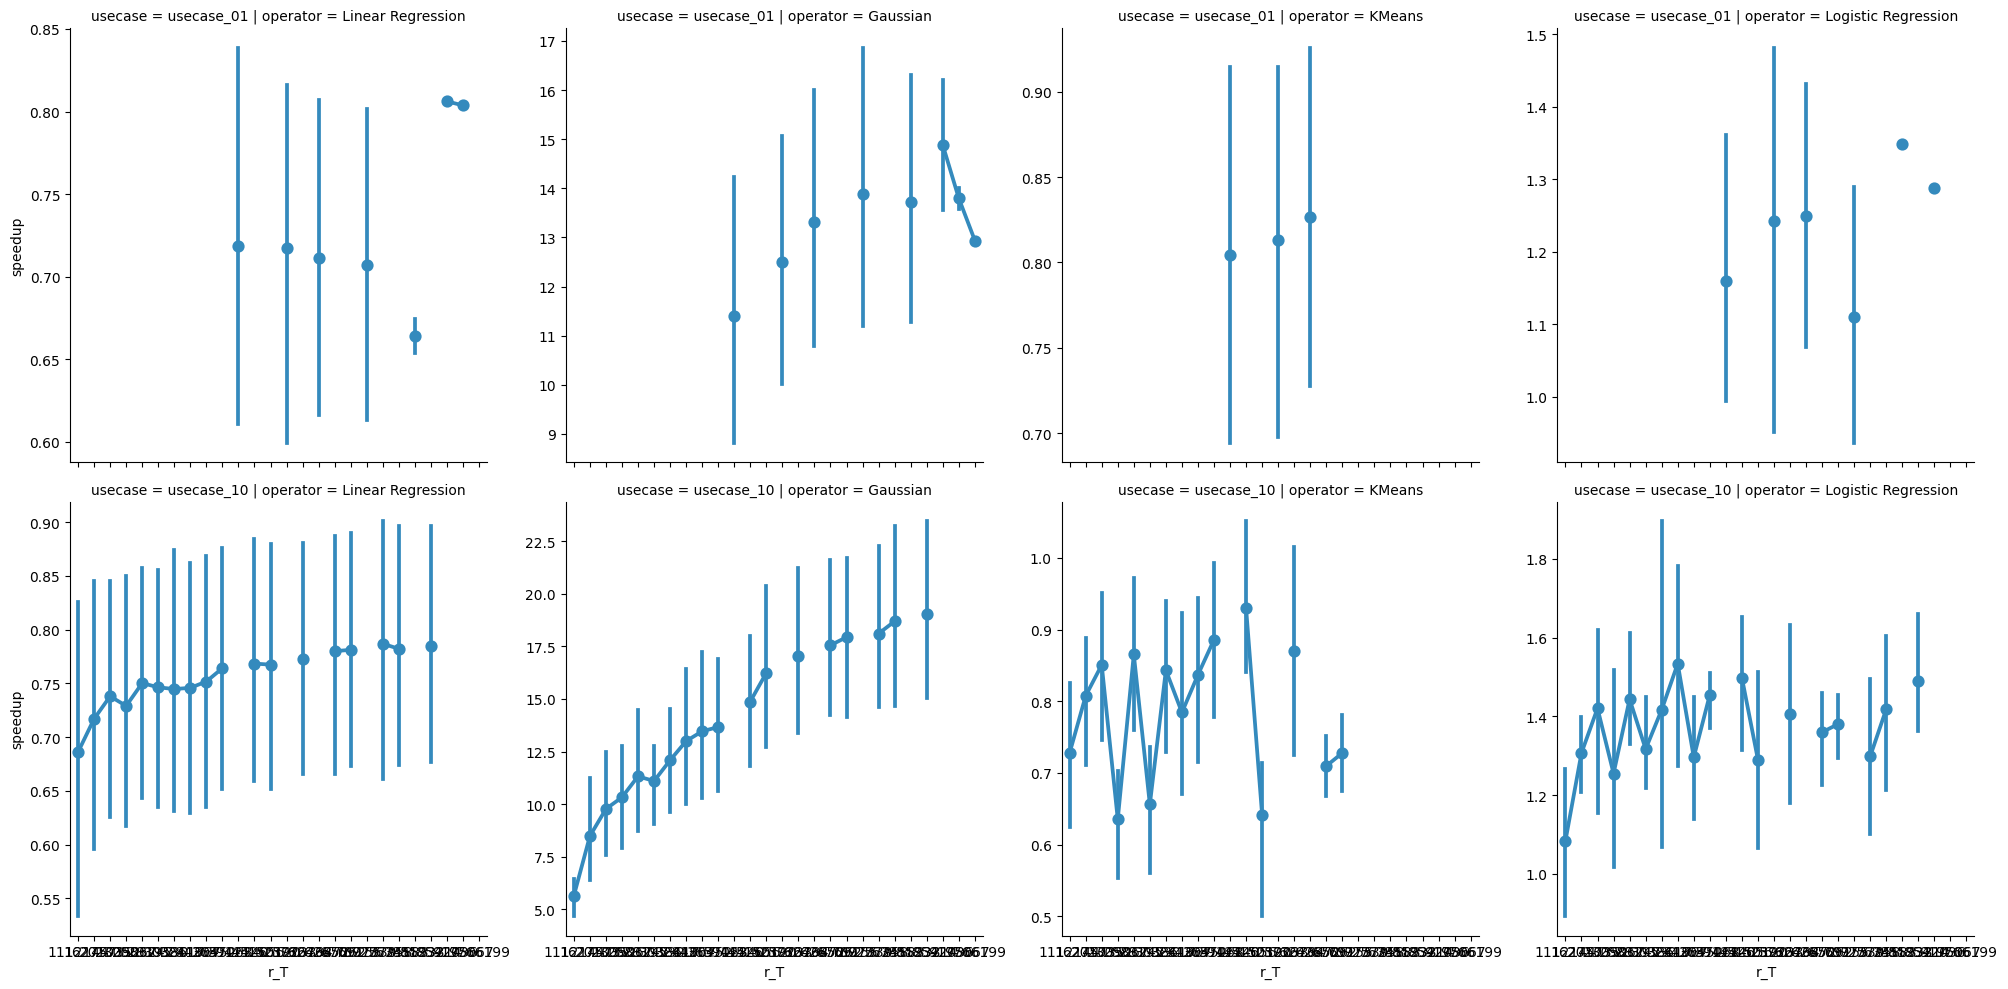

In [3]:
sns.catplot(data=tpc_df, y='speedup', x='r_T', col='operator', kind='point', row='usecase', sharey=False)

In [4]:
tpc_df['time_saved'] = tpc_df.times_mean * tpc_df.speedup - tpc_df.times_mean
tpc_df[tpc_df.label][['dataset', 'speedup', 'operator', 'compute_unit', 'times_mean', 'time_saved']].sort_values('time_saved', ascending=False).head(10)

,dataset,speedup,operator,compute_unit,times_mean,time_saved
346934,usecase_01:/mnt/data/output/scale_factor_0.05,18.436923,Gaussian,p100,0.325603,5.677513
347321,usecase_01:/mnt/data/output/scale_factor_0.04,19.518180,Gaussian,p100,0.296565,5.491852
347142,usecase_01:/mnt/data/output/scale_factor_0.06,16.199556,Gaussian,p100,0.342675,5.208503
347339,usecase_01:/mnt/data/output/scale_factor_0.08,12.937185,Gaussian,1080,0.420432,5.018771
347510,usecase_10:/mnt/data/output/scale_factor_0.5,27.357952,Gaussian,p100,0.189704,5.000201
347560,usecase_01:/mnt/data/output/scale_factor_0.07,13.578323,Gaussian,1080,0.392302,4.934501
347561,usecase_01:/mnt/data/output/scale_factor_0.07,14.012784,Gaussian,p100,0.372860,4.851948
347733,usecase_10:/mnt/data/output/scale_factor_0.45,26.903839,Gaussian,p100,0.180534,4.676522
347536,usecase_01:/mnt/data/output/scale_factor_0.03,18.280306,Gaussian,p100,0.269822,4.662608
347141,usecase_01:/mnt/data/output/scale_factor_0.06,13.562314,Gaussian,1080,0.367134,4.612056


<Axes: xlabel='complexity_ratio', ylabel='speedup'>

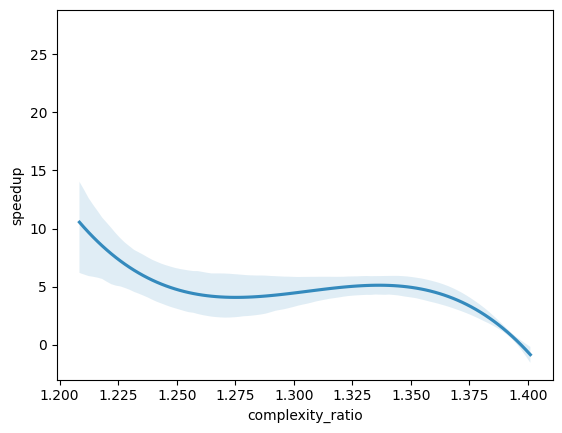

In [5]:
sns.regplot(data=tpc_df, x='complexity_ratio', y='speedup', order=3, scatter_kws={'s':0},)
